# *Telecom X - Análisis de Evasión de Clientes*

*Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.*

*Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.*

## Instalación de librerias

In [284]:
!! pip install pandas
!! pip install matplotlib
!! pip install numpy

['Could not find platform independent libraries <prefix>',
 'Requirement already satisfied: numpy in .\\env\\Lib\\site-packages (2.4.2)']

## Importar librerias

In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracción(E - Extract)

## Extracción de datos

*Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.*

## Importar el dataset

In [286]:
datos = pd.read_json('json/TelecomX_Data.json')

## Visualizar el dataset

In [287]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [288]:
datos.shape

(7267, 6)

# Transformación (T - Transform)

# Conoce el conjunto de datos

Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

In [289]:
datos.info()

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   str   
 1   Churn       7267 non-null   str   
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(4), str(2)
memory usage: 340.8+ KB


In [290]:
datos.dtypes

customerID       str
Churn            str
customer      object
phone         object
internet      object
account       object
dtype: object

## Normalizar los diccionarios del JSON

In [291]:
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

## Unir todo en un solo DataFrame

In [292]:
df_flat = pd.concat(
    [
        datos[['customerID', 'Churn']],
        customer_df,
        phone_df,
        internet_df,
        account_df
    ],
    axis=1
)

In [293]:
df_flat.info()

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   str    
 1   Churn             7267 non-null   str    
 2   gender            7267 non-null   str    
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   str    
 5   Dependents        7267 non-null   str    
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   str    
 8   MultipleLines     7267 non-null   str    
 9   InternetService   7267 non-null   str    
 10  OnlineSecurity    7267 non-null   str    
 11  OnlineBackup      7267 non-null   str    
 12  DeviceProtection  7267 non-null   str    
 13  TechSupport       7267 non-null   str    
 14  StreamingTV       7267 non-null   str    
 15  StreamingMovies   7267 non-null   str    
 16  Contract          7267 non-null   str    
 17  Paperl

In [294]:
df_flat.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [295]:
use_columns = ['customerID', 'Churn', 'tenure','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'Charges.Monthly', 'Charges.Total', 'PaymentMethod']

In [296]:
df_use = df_flat[use_columns]
df_use.head()

,customerID,Churn,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,PaymentMethod
0,0002-ORFBO,No,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,65.6,593.3,Mailed check
1,0003-MKNFE,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,59.9,542.4,Mailed check
2,0004-TLHLJ,Yes,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,73.9,280.85,Electronic check
3,0011-IGKFF,Yes,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,98.0,1237.85,Electronic check
4,0013-EXCHZ,Yes,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,83.9,267.4,Mailed check


In [297]:
df_use.tail()

,customerID,Churn,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,PaymentMethod
7262,9987-LUTYD,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,55.15,742.9,Mailed check
7263,9992-RRAMN,Yes,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,85.10,1873.7,Electronic check
7264,9992-UJOEL,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,50.30,92.75,Mailed check
7265,9993-LHIEB,No,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,67.85,4627.65,Mailed check
7266,9995-HOTOH,No,63,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,59.00,3707.6,Electronic check


In [298]:
df_use.info()

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   str    
 1   Churn             7267 non-null   str    
 2   tenure            7267 non-null   int64  
 3   PhoneService      7267 non-null   str    
 4   MultipleLines     7267 non-null   str    
 5   InternetService   7267 non-null   str    
 6   OnlineSecurity    7267 non-null   str    
 7   OnlineBackup      7267 non-null   str    
 8   DeviceProtection  7267 non-null   str    
 9   TechSupport       7267 non-null   str    
 10  StreamingTV       7267 non-null   str    
 11  StreamingMovies   7267 non-null   str    
 12  Contract          7267 non-null   str    
 13  Charges.Monthly   7267 non-null   float64
 14  Charges.Total     7267 non-null   str    
 15  PaymentMethod     7267 non-null   str    
dtypes: float64(1), int64(1), str(14)
memory usage: 908.5 

In [299]:
df_use.dtypes

customerID              str
Churn                   str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
Charges.Monthly     float64
Charges.Total           str
PaymentMethod           str
dtype: object

In [300]:
df_use['Charges.Total'] = df_use['Charges.Total'].replace(' ', np.nan)

In [301]:
df_use['Charges.Total'] = df_use['Charges.Total'].astype(np.float64)

In [302]:
df_use.dtypes

customerID              str
Churn                   str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
Charges.Monthly     float64
Charges.Total       float64
PaymentMethod           str
dtype: object

# Comprobación de incoherencias en los datos

*En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.*

In [303]:
df_use.isnull()

,customerID,Churn,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,PaymentMethod
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7263,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7264,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7265,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [304]:
df_use.isna().sum()

customerID           0
Churn                0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
Charges.Monthly      0
Charges.Total       11
PaymentMethod        0
dtype: int64

In [305]:
df_use["Charges.Total"] = df_use["Charges.Total"].fillna(0)
df_use.head()

,customerID,Churn,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,PaymentMethod
0,0002-ORFBO,No,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,65.6,593.30,Mailed check
1,0003-MKNFE,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,59.9,542.40,Mailed check
2,0004-TLHLJ,Yes,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,73.9,280.85,Electronic check
3,0011-IGKFF,Yes,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,98.0,1237.85,Electronic check
4,0013-EXCHZ,Yes,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,83.9,267.40,Mailed check


In [306]:
df_use.isna().sum()

customerID          0
Churn               0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
Charges.Monthly     0
Charges.Total       0
PaymentMethod       0
dtype: int64

In [307]:
df_use.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7262    False
7263    False
7264    False
7265    False
7266    False
Length: 7267, dtype: bool

In [308]:
df_use[df_use.duplicated()]

,customerID,Churn,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,PaymentMethod


In [309]:
df_use.duplicated().sum()

np.int64(0)

In [310]:
df_use["Contract"].unique()

<StringArray>
['One year', 'Month-to-month', 'Two year']
Length: 3, dtype: str

In [311]:
df_use["PaymentMethod"].unique()

<StringArray>
[             'Mailed check',          'Electronic check',
   'Credit card (automatic)', 'Bank transfer (automatic)']
Length: 4, dtype: str

In [312]:
df_use["Churn"].unique()

<StringArray>
['No', 'Yes', '']
Length: 3, dtype: str

# Manejo de inconsistencias

*Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.*

In [313]:
df_use.columns.str.lower()

Index(['customerid', 'churn', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'charges.monthly', 'charges.total', 'paymentmethod'],
      dtype='str')

In [314]:
df_use.columns = df_use.columns.str.lower().str.replace('.', '_')

In [315]:
df_use["churn"] = df_use["churn"].replace('', np.nan)
df_use = df_use.dropna(subset=["churn"])

In [316]:
df_use.head()

,customerid,churn,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,charges_monthly,charges_total,paymentmethod
0,0002-ORFBO,No,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,65.6,593.30,Mailed check
1,0003-MKNFE,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,59.9,542.40,Mailed check
2,0004-TLHLJ,Yes,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,73.9,280.85,Electronic check
3,0011-IGKFF,Yes,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,98.0,1237.85,Electronic check
4,0013-EXCHZ,Yes,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,83.9,267.40,Mailed check


In [317]:
df_use.tail()

,customerid,churn,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,charges_monthly,charges_total,paymentmethod
7262,9987-LUTYD,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,55.15,742.90,Mailed check
7263,9992-RRAMN,Yes,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,85.10,1873.70,Electronic check
7264,9992-UJOEL,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,50.30,92.75,Mailed check
7265,9993-LHIEB,No,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,67.85,4627.65,Mailed check
7266,9995-HOTOH,No,63,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,59.00,3707.60,Electronic check


In [318]:
datos.shape

(7267, 6)

# Carga y análisis(L - Load & Analysis)

## Análisis Descriptivo

*Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.*

In [319]:
pd.crosstab(df_use["contract"], df_use["churn"], normalize="index")

churn,No,Yes
contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [320]:
df_use[["tenure", "charges_monthly", "charges_total"]].describe()

,tenure,charges_monthly,charges_total
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [321]:
df_use.groupby("churn")[["tenure", "charges_monthly", "charges_total"]].agg(
    ["mean", "median", "std"]
)

tenure                   charges_monthly                     \
            mean median        std            mean  median        std   
churn                                                                   
No     37.569965   38.0  24.113777       61.265124  64.425  31.092648   
Yes    17.979133   10.0  19.531123       74.441332  79.650  24.666053   

      charges_total                         
               mean    median          std  
churn                                       
No      2549.911442  1679.525  2329.954215  
Yes     1531.796094   703.550  1890.822994

In [322]:
df_use["churn"].value_counts(normalize=True) * 100

churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

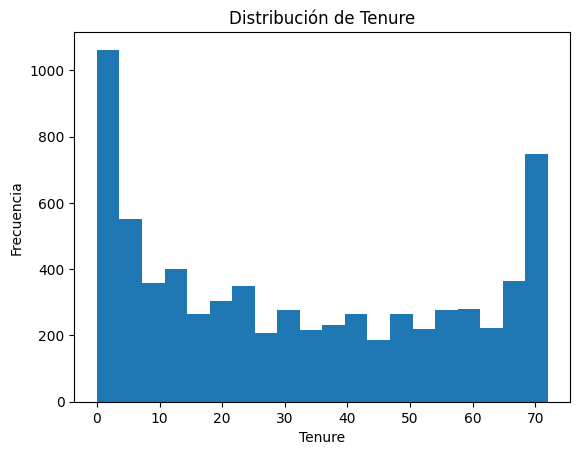

In [323]:
plt.hist(df_use["tenure"], bins=20)
plt.xlabel("Tenure")
plt.ylabel("Frecuencia")
plt.title("Distribución de Tenure")
plt.show()